# part1: 作业总概

**姓名**：黄伊姿  
**学号**：24210131  
**文档介绍**：这是第一个个人作业，主要让老师感知我们已经装好了python工具并进行了尝试。  

**作业要求**：  
1. 写一个python代码，生成模拟数据：N = 500，包含2个变量 (x1, x2)，x1 ~ N(0, 1)，x2 ~ N(3, 1.5)，corr(x1, x2) = 0.4。存入一个名为 df 的数据框中，种子值为学号后三位，即131。  
2. 基于写出来的数据模拟进行分析，具体任务如下：  
    - 呈现 df 数据框的前 5 行  
    - 呈现 df 数据框的描述性统计，包括均值，标准差，中位数，最大值，最小值，偏度，峰度  
    - 呈现 x1 的直方图  
    - 在同一幅图中绘制 x1 和 x2 的密度函数图  
    - 在同一幅图中绘制 x1 和 x2 的箱线图  
    - 在同一幅图中绘制 x1 和 x2 的小提琴图  
    - 计算 df 中 x1 和 x2 的相关系数，并输出结果  
    - 绘制 x1 和 x2 的散点图，添加回归线和置信区间


In [23]:
# 生成模拟数据
# 写一个python代码，生成模拟数据：N = 500，包含 2 个变量 (x1, x2)，x1 ~ N(0, 1)，x2 ~ N(3, 1.5)，corr(x1, x2) = 0.4。存入一个名为 df 的数据框中，种子值为学号后三位


# 基本设定
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei', 'WenQuanYi Micro Hei', 'Heiti TC']
plt.rcParams['axes.unicode_minus'] = False

np.random.seed(131)
N = 500
mean = [0, 3]
std = [1, 1.5]
corr = 0.4
cov = [[std[0]**2, corr*std[0]*std[1]], [corr*std[0]*std[1], std[1]**2]]

x = np.random.multivariate_normal(mean, cov, N)
df = pd.DataFrame(x, columns=['x1', 'x2'])

# part2: 分析任务

下方会使用上面的模拟数据进行以下分析方向的绘图与表格展示，从而进行数据分析：

1. 呈现 df 数据框的前 5 行
2. 呈现 df 数据框的描述性统计，包括均值、标准差、中位数、最大值、最小值、偏度、峰度
3. 呈现 x1 的直方图
4. 在同一幅图中绘制 x1 和 x2 的密度函数图
5. 在同一幅图中绘制 x1 和 x2 的箱线图
6. 在同一幅图中绘制 x1 和 x2 的小提琴图
7. 计算 df 中 x1 和 x2 的相关系数，并输出结果
8. 绘制 x1 和 x2 的散点图，添加回归线和置信区间

> **注意：每个任务前后都要有一个 markdown 单元用于介绍和总结。**


### 任务1：呈现上面的那个 df 数据框的前 5 行
说明：将上面生成的数据的表展现前5行数据

In [24]:
# 1. 呈现 上面 的那个 df 数据框的前 5 行，显示两位小数
df.head(5).round(2)


,x1,x2
0,0.39,3.61
1,-0.08,5.73
2,-0.13,1.78
3,-1.15,2.11
4,0.49,4.81


结论：从输出结果可以看到，df数据框的前5行包含了变量x1和x2的初始值，这有助于我们初步了解数据的基本情况。


### 任务2：呈现 df 数据框的描述性统计

说明：让代码自己选出这个表里的描述统计数据，包括均值，标准差，中位数，最大值，最小值，偏度，峰度

In [25]:
# 2. 呈现 df 数据框的描述性统计，包括均值，标准差，中位数，最大值，最小值，偏度，峰度

stats_dict = {
    '均值': df.mean(),
    '标准差': df.std(),
    '中位数': df.median(),
    '最大值': df.max(),
    '最小值': df.min(),
    '偏度': df.skew(),
    '峰度': df.kurt()
}
stats_df = pd.DataFrame(stats_dict).T.round(3)
print(stats_df.round(2))  # 转置

       x1    x2
均值  -0.04  2.96
标准差  0.97  1.57
中位数 -0.03  2.98
最大值  3.27  6.82
最小值 -3.03 -2.13
偏度   0.00 -0.10
峰度   0.17 -0.22


结论：从描述性统计数据可以看出，x1的均值接近0，标准差接近1，x2的均值接近3，标准差接近1.5，这与我们设定的参数相符。偏度接近0表示数据分布较为对称，峰度接近0表示数据分布接近正态分布。

### 任务3：呈现 x1 的直方图

说明：绘图，x1的直方图

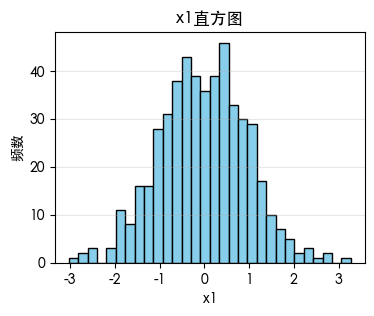

In [26]:
plt.figure(figsize=(4, 3))
plt.hist(df['x1'], bins=30, color='skyblue', edgecolor='black')
plt.title('x1直方图')
plt.xlabel('x1')
plt.ylabel('频数')
plt.grid(axis='y', alpha=0.3)
plt.show()

结论：从直方图可以看出，x1的分布大致符合正态分布，中心位置接近0，这与我们设定的参数x1 ~ N(0, 1)相符。

### 任务4: 同一幅图中绘制 x1 和 x2 的密度函数图。

说明：绘制一个x1和x2的密度函数图，都在一个图里，用不同颜色表示x1和x2

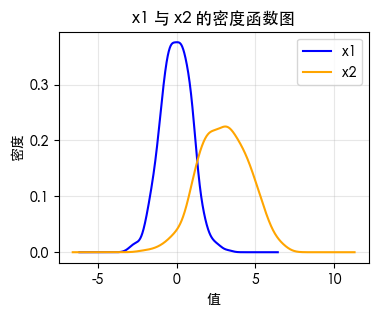

In [27]:
plt.figure(figsize=(4, 3))
df['x1'].plot(kind='kde', label='x1', color='blue')
df['x2'].plot(kind='kde', label='x2', color='orange')
plt.title('x1 与 x2 的密度函数图')
plt.xlabel('值')
plt.ylabel('密度')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

结论：从密度函数图可以看出，x1和x2的分布都接近正态分布，x1的中心位置在0附近，x2的中心位置在3附近，这与我们设定的参数相符。两条曲线的形状也反映了它们的标准差差异。

### 任务5: 在同一幅图中绘制 x1 和 x2 的箱线图。

说明：绘图，x1和x2的箱线图

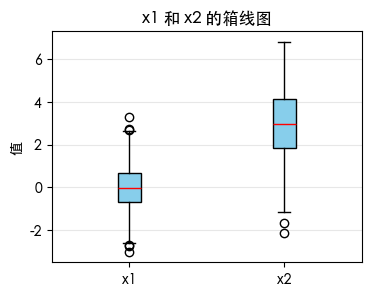

In [28]:
plt.figure(figsize=(4, 3))
plt.boxplot([df['x1'], df['x2']], tick_labels=['x1', 'x2'], patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='black'),
            medianprops=dict(color='red'))
plt.title('x1 和 x2 的箱线图')
plt.ylabel('值')
plt.grid(axis='y', alpha=0.3)
plt.show()

结论：从箱线图可以看出，x1和x2的中位数分别接近0和3，箱体的长度反映了数据的离散程度，x2的箱体较长，说明其标准差较大，这与我们设定的参数相符。箱线图还显示了数据的四分位数范围和异常值情况。

### 任务6：在同一幅图中绘制 x1 和 x2 的小提琴图。

说明：绘制x1和x2的小提琴图

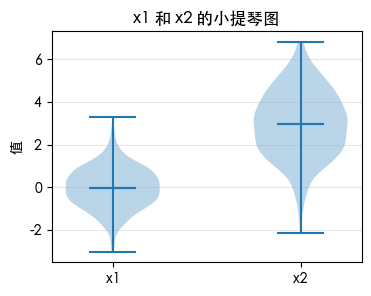

In [29]:
plt.figure(figsize=(4, 3))
plt.violinplot([df['x1'], df['x2']], showmeans=True, showmedians=True)
plt.xticks([1, 2], ['x1', 'x2'])
plt.title('x1 和 x2 的小提琴图')
plt.ylabel('值')
plt.grid(axis='y', alpha=0.3)
plt.show()

结论：小提琴图结合了箱线图和密度图的特点，从图中可以看出x1和x2的分布形状、中位数位置以及数据的离散程度。小提琴图的宽度表示数据在各个值上的密度，这有助于我们更全面地了解数据的分布情况。

### 任务7: 计算 df 中 x1 和 x2 的相关系数，并输出结果。

说明：计算相关系数

In [30]:
# 计算 x1 和 x2 的相关系数并打印
corr_coef = df['x1'].corr(df['x2'])
print("x1 和 x2 的相关系数为：", round(corr_coef, 3))

x1 和 x2 的相关系数为： 0.388


结论：计算得到的相关系数为0.388，接近0.4，这与我们设定的corr(x1, x2) = 0.4相符，说明我们生成的模拟数据成功实现了预期的相关性。

### 任务8: 绘制 x1 和 x2 的散点图，添加回归线和置信区间。

说明： 绘制散点图，添加回归线和置信区间

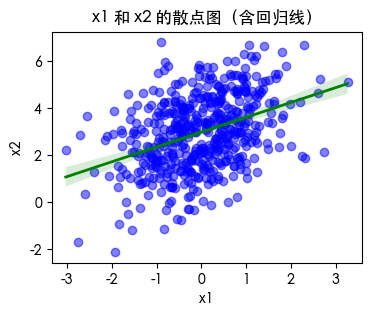

In [31]:
import seaborn as sns

plt.figure(figsize=(4, 3))
sns.regplot(
    x='x1', y='x2', data=df,
    line_kws={'color': 'green', 'lw': 2},
    scatter_kws={'alpha': 0.5, 'color': 'blue'},
    ci=95  # 95%置信区间
)
plt.title('x1 和 x2 的散点图（含回归线）')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

结论：从散点图和回归线可以看出，x1和x2之间存在正相关关系，这与我们设定的相关系数为正相符。回归线的斜率表示这种正相关的程度，置信区间则表示我们对回归线的估计精度。